# Taller Perceptron

Carlos Garavito,  
Juan Sebastián Cortes. 
***


1. Implementación de un perceptron y su regla de aprendizaje. El perceptron debe aceptar como entrada un vector de longittud arbitraria, i.e. el número de caracteristicas (regresores) puede ser arbitrario.

2. Implementación de un adaline con su regla de aprendizaje. El adaline debe aceptar como entrada un vector de longitud arbitraria, i.e. el número de caracteristicas (regresores) puede ser arbitrario.

3. Implemente un perceptrón y un adaline que pueda realizar las operaciones logicas AND, OR, XOR y XNOR.

4. Al implementar la AND y la OR, si compara los pesos con lso datos de la clase $1$ (cuya salida es $1$, ¿Qué puede concluir?

5. Solucione el problema de las flores de iris utilizando un perceptrón y un adaline. Utilice solamente dos clases. Compare las respuestas.


## Implementación de un perceptron

<center><img src="images/perceptron.png" width="400"></center>

Se ha visto que el perceptron puede ser descrito como se muestra en la figura, y que matematicamente es de la forma

$$z = \boldsymbol\omega^{\text{T}}\mathbf{x},$$ 

tal que, 

$$
\begin{equation}
  y = \varphi(z)=
    \begin{cases}
      1 & \text{if} & z \geq \theta,\\
      -1 & \text{if} & z < \theta.
    \end{cases}       
\end{equation}$$

Además, se ha definido que la regla de aprendizaje se muestra en dos pasos:

1. Inicializar los pesos $\omega$ a 0 o a números aleatorios pequeños.
2. Para cada dato de entrenamiento $\mathbf{x}^{(i)}$ realizar los siguientes pasos:
    * actualizar le valor de la predicción, $\hat{y}$,
    * Actualizar los pesos.

Esto es, 

$$\boldsymbol\omega := \boldsymbol\omega+\Delta\boldsymbol\omega,$$

$$\Delta\boldsymbol\omega = \eta\mathbf{X}^{\text{T}}(\mathbf{y}-\hat{\mathbf{y}}),$$

donde $\omega$ es el vector de pesos; $\eta$ es la constante de aprendizaje; $\mathbf{X}$ es una matrix de dimensiones $m\times N$, donde $m$ es el número de observaciones, y $N$ el número de entradas (regresores, cvaracteristicas, etc).

Así, en python se tiene:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Se cargan algunos datos de prueba:

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

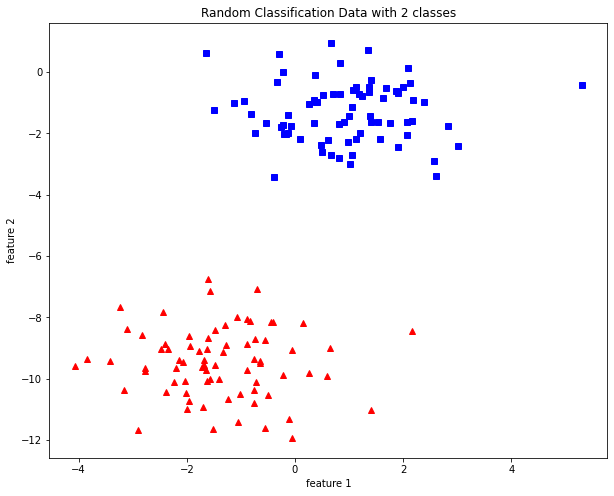

In [3]:
# datos de ejemplo 
# tomado de https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

from sklearn import datasets

X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
                           
#Plotting
                           
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [17]:
np.zeros([1, X.shape[1]]).shape

(1, 2)

Se define la clase `my_perceptron`, con los siguientes métodos: 

* `__init__`: inicializa la clase con valores de $\eta$ e iteraciones pre definidas, 
*  `fit`: Ajusta el perceptron a los datos de entrenamiento, 
* `predict`: calcula el valor de salida en función de los datos que recibe, 
* `net_input`: define la función de activación. En nuestro caso, una función escalón desde -1 a 1. 

In [11]:
class my_perceptron: 
    '''
    Clase perceptron basada en las notas de clase de curso de machine learning de la maestria MACC 
    y el tutorial 'programando un perceptron en python' https://www.llipe.com/2017/04/19/programando-un-clasificador-perceptron-en-python/

    Parámetros
    ----------
    eta: float
        Tasa de aprendizaje
    
    n_iter: int
        Número de iteraciones sobre el conjunto de datos

    Atributos
    ---------
    omega: numpy array 1d
            Vector de pesos

    '''

    def __init__(self, eta = 0.1, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y): 
        '''
        Ajusta los datos de entrenamiento

        Parámetros
        ----------
        X: numpy array, shape := [n_samples, n_features]
            Matriz de datos, donde n_samples es el número de observaciones y n_features es el número de caracteristicas.
        y: numpy array, shape := [n_samples]
            Vector de datos objetivo (target) 

        Returns 
        -------
        Self: objeto
        '''

        self.omega = np.zeros(X.shape[1])
        
        for i in range(self.n_iter): 
            # usamos el producto @ para sacar provecho de los array y no usar for
            delta_omega = self.eta * X.T @ (y - self.predict(X)) 
            self.omega = self.omega + delta_omega
            # print(self.omega)
        return self

    def predict(self, X): 
        '''
        Retorna la clase usando la función escalón.
        phi(z) = 1 si z >= theta; -1  si z < theta
        '''
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi
    
    def net_input(self, X): 
        z = X @ self.omega.T
        return z

In [ ]:
# from tutorial
import numpy as np

class my_perceptron:
    """Clasificador Perceptron basado en la descripción del libro
    "Python Machine Learning" de Sebastian Raschka.

    Parametros
    ----------

    eta: float
        Tasa de aprendizaje.
    n_iter: int
        Pasadas sobre el dataset.

    Atributos
    ---------
    w_: array-1d
        Pesos actualizados después del ajuste
    errors_: list
        Cantidad de errores de clasificación en cada pasada

    """
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Ajustar datos de entrenamiento

        Parámetros
        ----------
        X:  array like, forma = [n_samples, n_features]
            Vectores de entrenamiento donde n_samples es el número de muestras y
            n_features es el número de carácteristicas de cada muestra.
        y:  array-like, forma = [n_samples].
            Valores de destino

        Returns
        -------
        self:   object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def predict(self, X):
        """Devolver clase usando función escalón de Heaviside.
        phi(z) = 1 si z >= theta; -1 en otro caso
        """
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi

    def net_input(self, X):
        """Calcular el valor z (net input)"""
        # z = w · x + theta
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z

Definida la clase, se entrena el perceptron con los datos de ejemplo.

In [14]:
ones = np.ones((len(X),1))
X = np.hstack((X, ones))

my_classifier = my_perceptron()
my_classifier.fit(X,y)


Text(0.5, 1.0, 'Perceptron Classification Data with 2 classes')

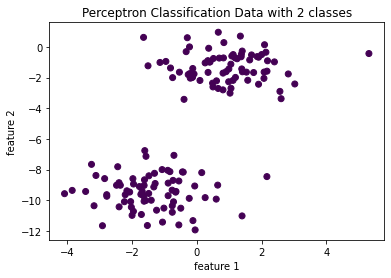

In [16]:
# plot the perceptron classification
y_pred = my_classifier.predict(X)
plt.scatter(X[:, 0],X[:, 1], c = y_pred)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Perceptron Classification Data with 2 classes')

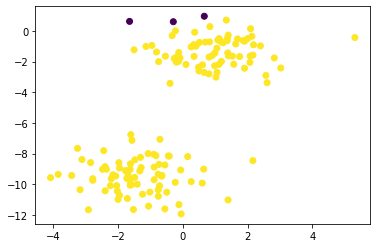

## Implementación adaline

Tomando en cuenta que 

$$\boldsymbol\omega:=\boldsymbol\omega-\eta\nabla\mathbf{J}(\boldsymbol\omega),$$

donde se puede definir $-\eta\nabla\mathbf{J}(\boldsymbol\omega) = \Delta\boldsymbol\omega $, tal que en forma vectorial resulta

$$\Delta\boldsymbol\omega = \eta\mathbf{X}^{\text{T}}(\mathbf{y}-\mathbf{X}\boldsymbol\omega),$$ 

y sabiendo que $z = \boldsymbol\omega^{\text{T}}\mathbf{x}$, y $\varphi(z) = z$, en python se procede de la siguiente forma:

In [189]:
# This class must be corrected! 
# compare with https://dzone.com/articles/adaline-explained-with-python-example-data-analyti

class my_adaline: 
    '''
    Clase perceptron basada en las notas de clase de curso de machine learning de la maestria MACC y el tutorial 'programando un perceptron en python' https://www.llipe.com/2017/04/19/programando-un-clasificador-perceptron-en-python/

    Parámetros
    ----------
    eta: float
        Tasa de aprendizaje
    
    n_iter: int
        Número de iteraciones sobre el conjunto de datos

    Atributos
    ---------
    omega: numpy array 1d
            Vector de pesos

    '''

    def __init__(self, eta = 0.1, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y): 
        '''
        Ajusta los datos de entrenamiento

        Parámetros
        ----------
        X: numpy array, shape := [n_samples, n_features]
            Matriz de datos, donde n_samples es el número de observaciones y n_features es el número de caracteristicas.
        y: numpy array, shape := [n_samples]
            Vector de datos objetivo (target) 

        Returns 
        -------
        Self: objeto
        '''

        self.omega = np.zeros(X.shape[1])
        
        for i in range(self.n_iter): 
            # usamos el producto @ para sacar provecho de los array y no usar 'for'
            delta_omega = self.eta * X.T @ (y - X @ self.omega)
            self.omega = self.omega + delta_omega
            # print(self.omega)
        return self

    def predict(self, X): 
        '''
        Retorna la clase usando la función escalón.
        phi(z) = 1 si z >= theta; -1  si z < theta
        '''
        phi = np.where(self.activation_function(self.net_input(X)) >= 0, 1, -1)
        return phi
    
    def net_input(self, X):
        z = z = X @ self.omega.T
    
        return z

    def activation_function(self, X):
        return X



In [188]:
my_2ndclassifier = my_adaline()
my_2ndclassifier.fit(X,y)

print(f"El vector de omega encontrado es: {my_2ndclassifier.omega}")

El vector de omega encontrado es: [-9.86939950e+26 -5.10035532e+26 -1.66426628e+26]


## Implementación perceptrón y adaline: AND, OR, XOR, XNOR

Definiendo las tablas de verdad de las compuertas, mediante arreglos

### Solución con perceptron

#### AND

In [11]:
# AND peceptron
X_and = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_and = np.array([
    0,
    0,
    0,
    1])

ones = np.ones((len(X_and),1))
X_and = np.hstack((X_and, ones))

my_andclassifier = my_perceptron(eta=0.01, n_iter=100)
my_andclassifier.fit(X_and, y_and)
my_andclassifier.predict(X_and)

array([-1, -1, -1,  1])

#### OR

In [384]:
# OR peceptron
X_or = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_or = np.array([
    0,
    1,
    1,
    1])
    
ones = np.ones((len(X_or),1))
X_or = np.hstack((X_or, ones))

my_andclassifier = my_perceptron(eta=0.01, n_iter=100)
my_andclassifier.fit(X_or, y_or)
my_andclassifier.predict(X_or)

array([-1,  1,  1,  1])

#### XOR

In [409]:
# XOR peceptron
X_xor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y_xor =  np.array([
    0,
    1,
    1,
    0])

ones = np.ones((len(X_xor),1))
X_xor = np.hstack((X_xor, ones))

my_andclassifier = my_perceptron(eta=0.01, n_iter=100)
my_andclassifier.fit(X_xor, y_xor)
my_andclassifier.predict(X_xor)

array([-1, -1, -1, -1])

#### XNOR

In [408]:
# XNOR peceptron
X_xnor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_xnor = np.array([
    1,
    0,
    0,
    1])

ones = np.ones((len(X_xnor),1))
X_xnor = np.hstack((X_xnor, ones))

my_andclassifier = my_perceptron(eta=0.01, n_iter=100)
my_andclassifier.fit(X_xnor, y_xnor)
my_andclassifier.predict(X_xnor)

array([-1, -1, -1, -1])

### Solucion con adaline

#### AND

In [190]:
# AND adaline
X_and = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_and = np.array([
    0,
    0,
    0,
    1])

ones = np.ones((len(X_and),1))
X_and = np.hstack((X_and, ones))

my_andclassifier = my_adaline(eta=0.1, n_iter=100)
my_andclassifier.fit(X_and, y_and)
my_andclassifier.predict(X_and)

array([-1,  1,  1,  1])

#### OR

In [172]:
# OR adaline
X_or = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_or = np.array([
    0,
    1,
    1,
    1])
    
ones = np.ones((len(X_or),1))
X_or = np.hstack((X_or, ones))

my_andclassifier = my_adaline(eta=0.01, n_iter=100)
my_andclassifier.fit(X_or, y_or)
my_andclassifier.predict(X_or)

array([1, 1, 1, 1])

#### XOR

In [425]:
# XOR adaline
X_xor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y_xor =  np.array([
    0,
    1,
    1,
    0])
    
ones = np.ones((len(X_or),1))
X_or = np.hstack((X_or, ones))

my_andclassifier = my_adaline(eta=0.01, n_iter=100)
my_andclassifier.fit(X_or, y_or)
my_andclassifier.predict(X_or)

array([0.42520267, 0.76237983, 0.76237983, 1.099557  ])

#### XNOR

In [430]:
# XNOR adaline
X_xnor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_xnor = np.array([
    1,
    0,
    0,
    1])

ones = np.ones((len(X_xnor),1))
X_xnor = np.hstack((X_xnor, ones))

my_andclassifier = my_adaline(eta=0.01, n_iter=100)
my_andclassifier.fit(X_xnor, y_xnor)
my_andclassifier.predict(X_xnor)

array([0.38959124, 0.48209111, 0.48209111, 0.57459099])

## Al implementar la AND y la OR, si compara los pesos con los datos de la clase $1$ (cuya salida es $1$), ¿Qué puede concluir?

### AND

In [431]:
# AND
X_and = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_and = np.array([
    0,
    0,
    0,
    1])

ones = np.ones((len(X_and),1))
X_and = np.hstack((X_and, ones))

my_classifier = my_perceptron(eta=0.01, n_iter=100)
my_classifier.fit(X_and, y_and)

my_classifier2nd = my_adaline(eta=0.01, n_iter=100000)
my_classifier2nd.fit(X_and, y_and)

print(f"Pesos and-perceptron {my_classifier.omega}; pesos and-adaline {my_classifier2nd.omega}")

Pesos and-perceptron [ 0.02  0.02 -0.02]; pesos and-adaline [ 0.5   0.5  -0.25]


### OR

In [83]:
# OR
X_or = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_or = np.array([
    0,
    1,
    1,
    1])
ones = np.ones((len(X_or),1))
X_or = np.hstack((X_or, ones))

my_classifier = my_perceptron(eta=0.01, n_iter=100)
my_classifier.fit(X_or, y_or)

my_classifier2nd = my_adaline(eta=0.01, n_iter=100)
my_classifier2nd.fit(X_or, y_or)

print(f"Pesos and-perceptron {my_classifier.omega}; pesos and-adaline {my_classifier2nd.omega}")

Pesos and-perceptron [ 4.00000000e-02  4.00000000e-02 -3.46944695e-18]; pesos and-adaline [0.38959124 0.38959124 0.37979537]


Se puede ver que los pesos del perceptron comparados con adaline, en ambos casos, son considerablemene más pequeños. 

## Solución Iris con perceptron y adaline

In [77]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

ones = np.ones((len(X),1))
X = np.hstack((X, ones))

y = np.where(y == 0, 1, -1)

Text(0, 0.5, 'sepal width (cm)')

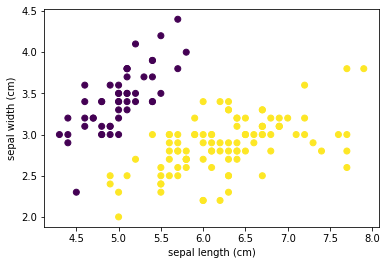

In [78]:
plt.scatter(iris.data[:, 0], iris.data[:, 1], c = y )
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### Solución Iris con perceptron 

Text(0, 0.5, 'sepal width (cm)')

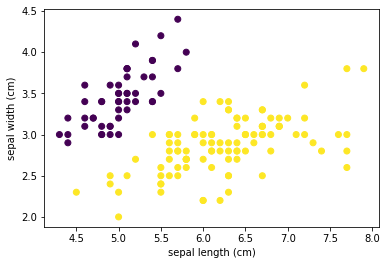

In [79]:
my_iris_classifier = my_perceptron(eta=0.01, n_iter=100)

my_iris_classifier.fit(X,y)

y_pred = my_iris_classifier.predict(X)

plt.scatter(iris.data[:, 0], iris.data[:, 1], c = y_pred)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### Solución Iris con adaline


[-1.02077578e+181 -5.27521373e+180 -1.72132328e+180]
***
[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
  3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
  3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
  2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
  2.5 2.8 2.9 3.  2.8 3.  2.9

Text(0, 0.5, 'sepal width (cm)')

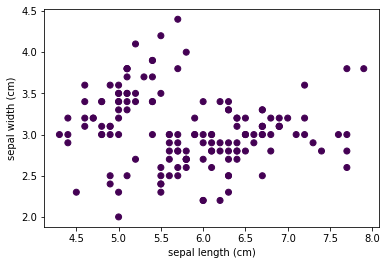

In [144]:
my_iris_classifier = my_adaline(eta=0.01, n_iter=100)

my_iris_classifier.fit(X,y)

y_pred = my_iris_classifier.predict(X)

plt.scatter(iris.data[:, 0], iris.data[:, 1], c = y_pred)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### Comparación de resultados

Se puede ver que en el problema del Iris data set, el perceptron clasifica mejor que el adaline. 